In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import joblib

In [53]:
data = pd.read_csv('/kaggle/input/review-dataset/Review Dataset.csv')

In [54]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [55]:
data.shape

(500, 2)

In [56]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sentiment']=le.fit_transform(data['sentiment'])
data['sentiment'].head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment'>

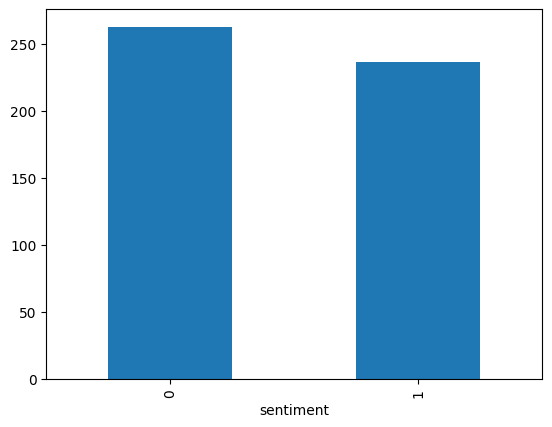

In [106]:
data['sentiment'].value_counts().plot(kind='bar')

In [59]:
data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [60]:
data['char_count']=data['review'].apply(len)
data.head()

,review,sentiment,char_count
0,One of the other reviewers has mentioned that ...,1,1725
1,A wonderful little production. The filming tec...,1,962
2,I thought this was a wonderful way to spend ti...,1,902
3,Basically there's a family where a little boy ...,0,712
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1269


In [61]:
data['word_count']=data['review'].apply(lambda x :len(str(x).split()))
data.head()

,review,sentiment,char_count,word_count
0,One of the other reviewers has mentioned that ...,1,1725,301
1,A wonderful little production. The filming tec...,1,962,156
2,I thought this was a wonderful way to spend ti...,1,902,162
3,Basically there's a family where a little boy ...,0,712,132
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1269,222


In [62]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
data['sent_count']=data['review'].apply(lambda x : len(nltk.sent_tokenize(str(x))))
data.head()

,review,sentiment,char_count,word_count,sent_count
0,One of the other reviewers has mentioned that ...,1,1725,301,10
1,A wonderful little production. The filming tec...,1,962,156,7
2,I thought this was a wonderful way to spend ti...,1,902,162,4
3,Basically there's a family where a little boy ...,0,712,132,6
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1269,222,9


In [64]:
data[data['sentiment']==1]['char_count'].mean()


1402.662447257384

In [65]:
data[data['sentiment']==0]['char_count'].mean()

1277.8326996197718

In [66]:
import re
review = re.sub('[^a-zA-Z]',' ',data['review'][1])
review

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

In [67]:
review = review.lower()
review

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

In [68]:
review = review.split()
review

['a',
 'wonderful',
 'little',
 'production',
 'the',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming',
 'very',
 'old',
 'time',
 'bbc',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 'and',
 'sometimes',
 'discomforting',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 'the',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'not',
 'only',
 'has',
 'got',
 'all',
 'the',
 'polari',
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 'you',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'williams',
 'diary',
 'entries',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 'a',
 'masterful',
 'production',
 'about',
 'one',
 'of',
 'the',
 'great',
 'master',
 's',
 'of',
 'comedy',
 'and',
 'his',
 'life',
 'the',
 'realism',
 'really',
 'co

In [69]:
from nltk.corpus import stopwords
all_stopwords = stopwords.words("english")
all_stopwords.remove('not')
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [70]:
review = [word for word in review if word not in set(all_stopwords)]
review

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actors',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'not',
 'got',
 'polari',
 'voices',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'williams',
 'diary',
 'entries',
 'not',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'orton',
 'halliwell',
 'sets',
 'particularly',
 'flat',
 'halliwell',
 'murals',
 'decorating',
 'every',
 'surface',
 'terribly',
 

In [71]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in review]
review = " ".join(review)
review

'wonder littl product film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen not got polari voic pat truli see seamless edit guid refer william diari entri not well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

In [72]:
custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                    'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
final_corpus =[]
ps =PorterStemmer()
stop_words = set(stopwords.words("english")) - custom_stopwords

for i in range(len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    final_corpus.append(review)
    

In [73]:
data['processed_text']=final_corpus
data.head()

,review,sentiment,char_count,word_count,sent_count,processed_text
0,One of the other reviewers has mentioned that ...,1,1725,301,10,one review mention watch oz episod hook right ...
1,A wonderful little production. The filming tec...,1,962,156,7,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,1,902,162,4,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,712,132,6,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1269,222,9,petter mattei love time money visual stun film...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=8,background_color="white")
pos = wc.generate(data[data['sentiment']==1]['processed_text'].str.cat(sep=" "))
plt.imshow(pos)

In [ ]:
neg = wc.generate(data[data['sentiment']==0]['processed_text'].str.cat(sep=" "))
plt.imshow(neg)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(final_corpus).toarray()

In [77]:
X
X.shape


(500, 1500)

In [78]:
joblib.dump(cv,"count_v_res")

['count_v_res']

In [79]:
y = data['sentiment']
y

0      1
1      1
2      1
3      0
4      1
      ..
495    0
496    0
497    0
498    0
499    1
Name: sentiment, Length: 500, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=38)

In [96]:
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_score(y_test,y_pred)

0.63

In [99]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.84

In [103]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.84

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.77

In [104]:
import joblib
joblib.dump(lr,'Movies_review_model')

['Restaurant_review_model']